# Analisi del dataset

#### 1) Importo funzionalità librerie

In [2]:
# Librerie
%matplotlib inline
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Carico dataset

In [13]:
path = '../color_extr/data.csv'
data = pd.read_csv(path,header=0, sep=',')
data.head()

,presenza_foglie,assenza_foglie,presenza_bachi_sfondo,assenza_bachi_sfondo,classificazione,foto
0,63.32,36.68,11.01,88.99,0,IMG_2663.jpg
1,63.25,36.75,10.65,89.35,0,IMG_2664.jpg
2,63.22,36.78,10.53,89.47,0,IMG_2665.jpg
3,63.50,36.50,10.23,89.77,0,IMG_2666.jpg
4,62.32,37.68,11.24,88.76,0,IMG_2667.jpg


#### 3) Struttura del dataset

##### - Tipi di dato presenti

In [14]:
data.dtypes

presenza_foglie          float64
assenza_foglie           float64
presenza_bachi_sfondo    float64
assenza_bachi_sfondo     float64
classificazione            int64
foto                      object
dtype: object

##### - Statistiche sui dati 

In [16]:
data.describe().round(2)

,presenza_foglie,assenza_foglie,presenza_bachi_sfondo,assenza_bachi_sfondo,classificazione
count,1351.00,1351.00,1351.00,1351.00,1351.00
mean,52.17,47.83,16.12,83.88,0.56
std,13.62,13.62,6.99,6.99,0.50
min,29.24,10.43,1.55,71.33,0.00
25%,40.90,37.17,10.60,78.01,0.00
50%,46.55,53.45,17.87,82.13,1.00
75%,62.83,59.10,21.99,89.40,1.00
max,89.57,70.76,28.67,98.45,1.00


##### - Presenza di valori nulli (Nan/Nil)

In [17]:
data.isna().sum()

presenza_foglie          0
assenza_foglie           0
presenza_bachi_sfondo    0
assenza_bachi_sfondo     0
classificazione          0
foto                     0
dtype: int64

#### Bilanciamento dei valori della classificazione

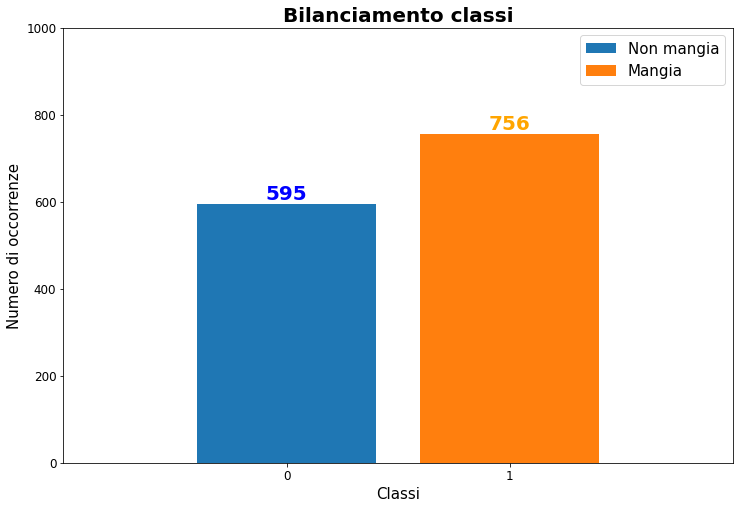

In [221]:

data_class_0_len = len(data[data.classificazione == 0])
data_class_1_len = len(data[data.classificazione == 1])

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Bilanciamento classi", fontsize=20, fontweight='bold')
ax.bar(0,data_class_0_len, label='Non mangia', align="center")
ax.bar(1,data_class_1_len, label='Mangia', align="center")

ax.set(xticks=range(2), xlim=[-1, 2])
ax.set(ylim=[0, 1000])
ax.text(0-0.093,data_class_0_len + 10,str(data_class_0_len), color='blue', fontweight='bold', fontsize=20)
ax.text(1-0.093,data_class_1_len + 10,str(data_class_1_len), color='orange', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.legend(fontsize=15)
ax.set_xlabel('Classi', fontsize=15)
ax.set_ylabel('Numero di occorrenze', fontsize=15)
plt.show()

#### Scatter plot classificazione

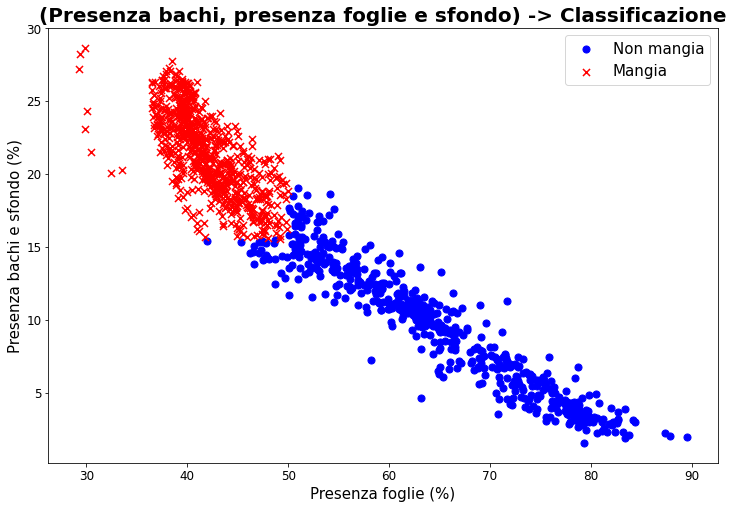

In [222]:
data_class_0 = data[data.classificazione == 0]
data_class_1 = data[data.classificazione == 1]

fig, ax = plt.subplots(figsize=(12,8))
plt.title("(Presenza bachi, presenza foglie e sfondo) -> Classificazione", fontsize=20, fontweight='bold')
ax.scatter(data_class_0['presenza_foglie'], data_class_0['presenza_bachi_sfondo'], s=50, c='b', marker='o', label='Non mangia')
ax.scatter(data_class_1['presenza_foglie'], data_class_1['presenza_bachi_sfondo'], s=50, c='r', marker='x', label='Mangia')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.legend(fontsize=15)
ax.set_xlabel('Presenza foglie (%)', fontsize=15)
ax.set_ylabel('Presenza bachi e sfondo (%)', fontsize=15)
plt.show()

#### Correlation coefficient matrix

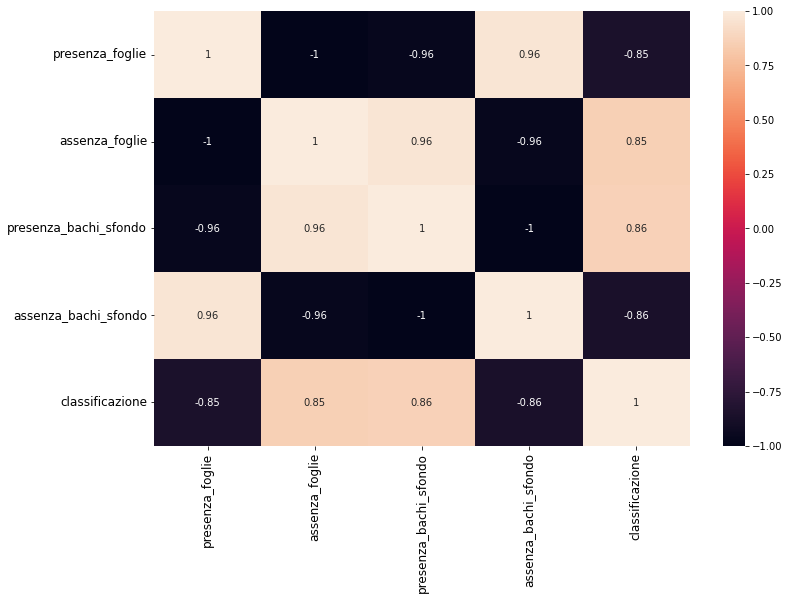

In [223]:
plt.subplots(figsize=(12,8))

plt.title("Correlaion Coefficient Matrix", fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(data_class_0['presenza_foglie'], data_class_0['presenza_bachi_sfondo'], s=50, c='b', marker='o', label='Non mangia')
ax.scatter(data_class_1['presenza_foglie'], data_class_1['presenza_bachi_sfondo'], s=50, c='r', marker='x', label='Mangia')



ax.legend(fontsize=15)
ax.set_xlabel('Presenza foglie (%)', fontsize=15)
ax.set_ylabel('Presenza bachi e sfondo (%)', fontsize=15)
plt.show()